In [ ]:
#importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
#loading the dataset
wine=pd.read_csv('winequality-red.csv',sep=';')

In [ ]:
# print the first five rows
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# you can print information about the variables that you are working with as shown below
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#check if you have null values beacuse they are not desirable
#the code also shows where the null values are located #
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#preprocessing data
bins=(2,6.5,8) #defines the quality values that will tell if wine is good, good wine will range between 6.5 to 8
group_names=['bad','good'] #defines the names of the groups
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [ ]:
label_quality=LabelEncoder()

In [ ]:
wine['quality']=label_quality.fit_transform(wine['quality'])

In [ ]:
wine.head(10) #print first 10 rows the quality is in boolean 1 means good wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
#calculating how many wines are quality and how many are not. 1 represents quality wine
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

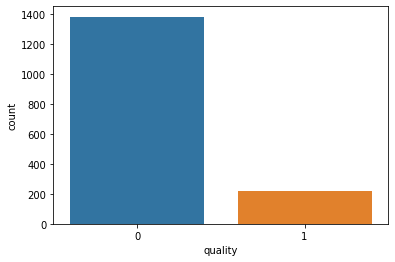

In [ ]:
# use seaborn which sits on top of matplotlib to plot a simple bar graph of the above info on wine quality
sns.countplot(wine['quality'])

In [ ]:
#now separate the dataset as response variable and feature variable
X=wine.drop('quality', axis=1)
y=wine['quality']

In [ ]:
# Train and test splitting of data
# 0.2 means that we want to use 20% of the data for testing. the default is 25% so if you dont offer a value the system takes default value
#if you also dont specify the random state it takes a defauult one
X_train, X_test, y_train, y_test=train_test_split( X,y, test_size=0.2, random_state=42)

X_train[:10]# you can print the first 10 rows of the training set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
522,8.2,0.390,0.49,2.3,0.099,47.0,133.0,0.99790,3.38,0.99,9.8
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6
1404,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7
1055,8.2,0.640,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.1
277,11.5,0.180,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1


In [ ]:
# applying standard scaling to get optimized results
#scaling is supposed to standardize values so that you dont have some columnsin the data set having very small values while others have huge values
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
# print the first 10 columns of the training set to see if scaling has taken effect
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

# Random Forest Classifier model

In [ ]:
rfc=RandomForestClassifier(n_estimators=200)# create the random test variable
rfc.fit(X_train, y_train) #fitting the model with training data set
pred_rfc=rfc.predict(X_test) #predicting with the test data set

In [ ]:
#print the prediction of 20 values
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
# lets see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



In [ ]:
# print confusion matrix to see how many were correct and how many were wrong
print(confusion_matrix(y_test, pred_rfc))

#from the output 265 correct, 8 wrong

[[265   8]
 [ 22  25]]


# SVM Classiffier

In [ ]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf=clf.predict(X_test)

In [ ]:
# print prediction of 2o wines
pred_clf[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
# lets check how the model performed
print (classification_report (y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [ ]:
# SVM got a weighted average of 86%

# Neural Networks

In [ ]:
mlpc=MLPClassifier(hidden_layer_sizes =(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc= mlpc.predict(X_test)

D:\_application\software\Anconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# print the prediction of first 20 wines
pred_mlpc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.66      0.57      0.61        47

    accuracy                           0.89       320
   macro avg       0.79      0.76      0.78       320
weighted avg       0.89      0.89      0.89       320

[[259  14]
 [ 20  27]]


In [ ]:
# print the Accuracy score for each algorithim
from sklearn.metrics import accuracy_score
# Random forest
cm=accuracy_score(y_test, pred_rfc)
print ("Random forest", cm)

cm2=accuracy_score(y_test, pred_clf)
print("SVM", cm2)

cm3=accuracy_score(y_test, pred_mlpc)
print("Neural Networks", cm3)

Random forest 0.90625
SVM 0.875
Neural Networks 0.89375


In [ ]:
# neural network scored 89%. if you run several times the values change
# neural network is suitable with huge chunks of data
# Random forest with mid-sized data


In [ ]:
# predicting wine using data imputted by user

In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
Xnew=[[7.3, 0.58, 0.00, 2.0, 0.065,15.0,21.0,0.9946,3.36,0.47,10.0]] # wine features to be used in prediction
Xnew=sc.transform(Xnew)#standardize
ynew=rfc.predict(Xnew)
ynew

array([0])

In [ ]:
#the output shows that the above wine is a bad wine

In [ ]:
mlpc.predict(Xnew)
ynew

array([0])

In [ ]:
clf.predict(Xnew)
ynew

array([0])

In [ ]:
#all the three alogorthms predicted the wine as bad wine